In [18]:
import os
import pandas as pd

DATA_ROOT = "data"

def load_data(data_path=DATA_ROOT):
    csv_path = os.path.join(data_path, "training_set_20190828.csv")
    X = pd.read_csv(csv_path, usecols=[4,5,6,7,8,10,11,12])
    y = X['is_match']
    X.drop(columns=['is_match'], inplace=True)
    return (X, y) 

In [20]:
X, y = load_data()

X.head()

,name_score,speed_match,feature_id_match,oneway_match,dironsign_match,coverage_over_link_area,coverage_over_candidate_area
0,1.0,1,1,1,1,0.509467,0.025055
1,1.0,1,1,1,1,0.465511,0.025103
2,0.0,0,0,1,1,0.022108,0.994585
3,0.0,0,0,1,1,0.014718,0.980469
4,1.0,1,1,1,1,0.000199,0.999751


In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48082 entries, 0 to 48081
Data columns (total 7 columns):
name_score                      48082 non-null float64
speed_match                     48082 non-null int64
feature_id_match                48082 non-null int64
oneway_match                    48082 non-null int64
dironsign_match                 48082 non-null int64
coverage_over_link_area         48082 non-null float64
coverage_over_candidate_area    48082 non-null float64
dtypes: float64(3), int64(4)
memory usage: 2.6 MB


In [22]:
X.describe()

,name_score,speed_match,feature_id_match,oneway_match,dironsign_match,coverage_over_link_area,coverage_over_candidate_area
count,48082.000000,48082.000000,48082.000000,48082.000000,48082.000000,48082.000000,4.808200e+04
mean,0.670451,0.662930,0.643193,0.913003,0.958384,0.132598,6.213487e-01
std,0.448009,0.472714,0.479062,0.281834,0.199713,0.216009,4.540378e-01
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.413709e-10
25%,0.074074,0.000000,0.000000,1.000000,1.000000,0.000156,3.366548e-02
50%,1.000000,1.000000,1.000000,1.000000,1.000000,0.010602,9.709829e-01
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.189876,9.995582e-01
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00


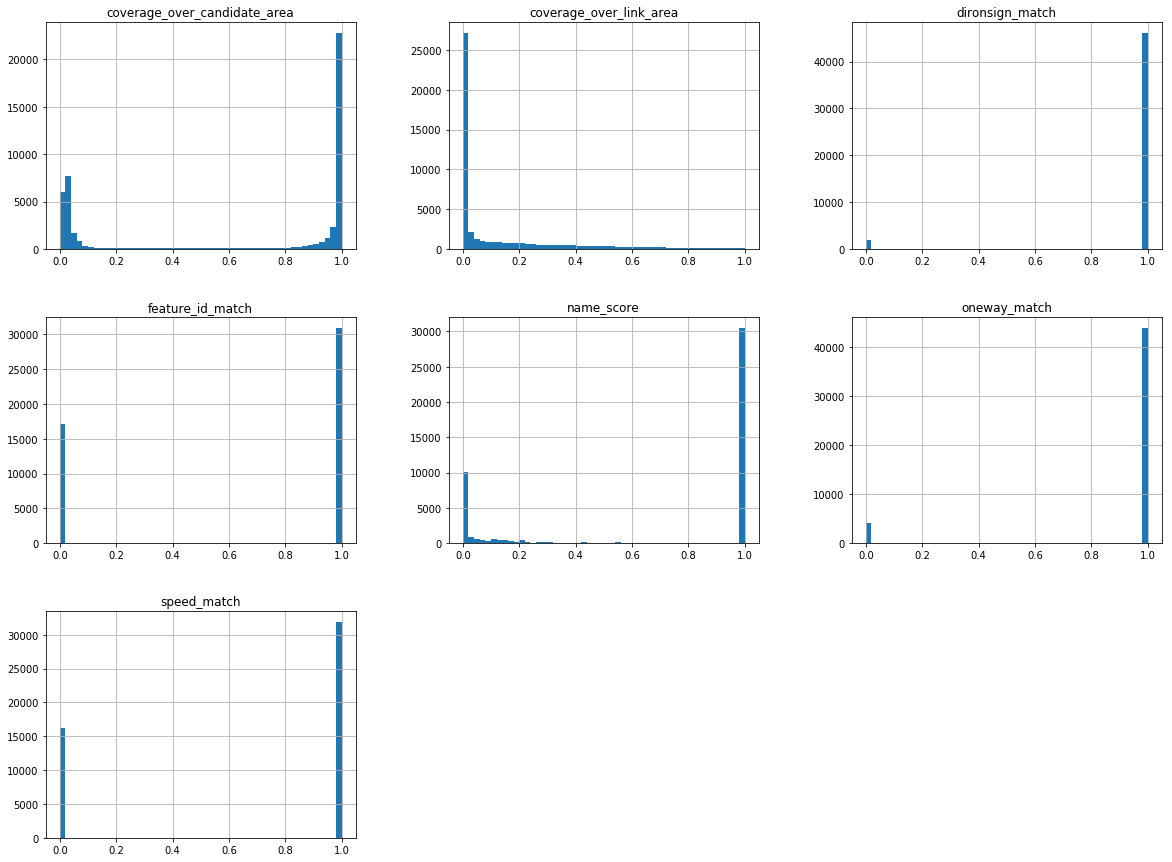

In [23]:
%matplotlib inline  
import matplotlib.pyplot as plt
X.hist(bins=50, figsize=(20,15))
plt.show()

In [28]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

n_samples = len(X.index)
#train_set, test_set = train_test_split(training, test_size=0.2, random_state=26)

# stratified split
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=26)
for train_index, test_index in split.split(np.zeros(n_samples), y):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    
X_train.head()



,name_score,speed_match,feature_id_match,oneway_match,dironsign_match,coverage_over_link_area,coverage_over_candidate_area
3366,1.0,1,1,1,1,3.917238e-01,0.300481
46664,1.0,1,1,1,1,0.000000e+00,1.000000
14055,0.0,1,0,1,1,0.000000e+00,1.000000
47255,0.0,1,1,0,1,3.750727e-01,0.004281
17965,1.0,1,1,1,1,2.116251e-07,1.000000


In [29]:
# Look at attribute correlations

corr_matrix = X_train.corr()
corr_matrix["coverage_over_link_area"].sort_values(ascending=False)

coverage_over_link_area         1.000000
name_score                      0.368474
feature_id_match                0.363227
speed_match                     0.163885
oneway_match                    0.132624
dironsign_match                 0.063698
coverage_over_candidate_area   -0.708137
Name: coverage_over_link_area, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2b4dd05550>,
      dtype=object)

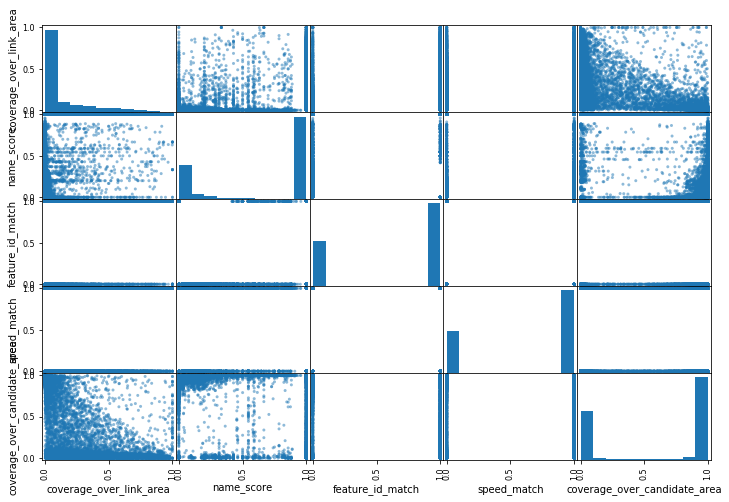

In [32]:
from pandas.plotting import scatter_matrix

attributes = ["coverage_over_link_area", "name_score", "feature_id_match", 
              "speed_match", "coverage_over_candidate_area"]
scatter_matrix(X_train[attributes], figsize=(12, 8))